First guess at a, b  5.0 3.5
First loss function is  7.890933746255283
Best a,b is  1.2036993070662023 3.310473877247611
Best loss function is  2.690376323682816


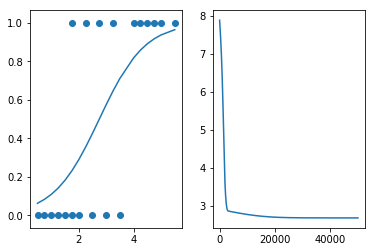

In [2]:
# Import required python packages for calculating and graphing
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# Define a function that takes three inputs and returns the value of the inverse logit, the mean function - the sigmoid function curve.  
# For a logistic regression, the dependent variable is binary - it is either 1 or 0.  Logistic regression is looking for probability.
def logistic(x,a,b):
    return 1/(1.0+np.exp(-a*x+b))

# Define a function that takes four inputs (a, b, x and observed y data), generates a y_model function based on a, b, and x and then
# returns the sum of the squared residuals i.e. sum of (the y_model data generated minus the observed y data input) squared
def loss(x,y_obs,a,b):
    y_model = logistic(x,a,b)
    return np.sum( (y_model-y_obs)**2 )

# Create the array of x data and the corresponding array of observed y data
x = np.array( [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50] )
y_obs = np.array( [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1] )

# Set the values for a and b as constants
a,b = 5.0,3.5
# Define y_model as the logistic function (defined above) performed on inputs x, a and b (defined above).  Result will be an array of y_model data.
y_model = logistic(x,a,b)

# Print to screen the constant values for a and b and then print the value of the loss function defined above = which is the sum of the
# squared residuals between the predicted y and observed y.  The closer the SSR is to 0, the better model you have.
print('First guess at a, b ',a,b)
print('First loss function is ',loss(x,y_obs,a,b))

# Now let's improve the model.
# Define gradient with respect to a value as the partial derivative of the loss function (SSR) with respect to the a value
d_by_da = grad(loss,2)
# Define gradient with respect to b value as the partial derivative of the loss function (SSR) with respect to the b value
d_by_db = grad(loss,3)

# Set the learning rate - which is how much to move from the original value to predict the next value
learning_rate = 0.001
# Set the number of iterations to perform in search of the local minimum; could alternatively set a precision setting here.
maximum_number_of_iterations = 50000

# Create an empty array
ssr = []

#Loop through the number of interations specified above (1000) to calculate the best a and b values for the model.
for iter in range(maximum_number_of_iterations):
    a -= learning_rate*d_by_da(x,y_obs,a,b)  # calculate a new a as the prior a minus the learning rate times the gradiant of the prior a
    b -= learning_rate*d_by_db(x,y_obs,a,b)  # calculate b as the prior b minus the learning rate times the gradient of the prior b          
    y_model = logistic(x,a,b)                # generate the new predicted y values based on the new a and b
    ssr.append(loss(x,y_obs,a,b))            # append to the SSR array, the new value of the loss function based on the new a and b

# Print to screen the results of the iteration above - so the new a, b and loss function
print('Best a,b is ',a,b)
print('Best loss function is ',loss(x,y_obs,a,b))

# Put 1 row of 2 plots on the screen.  This is the first of the 2 plots.  It is a scatterplot of the x values with the observed y values. 
# This data does not fit a linear model.  It appears to be categorical data.
# Also put on the same plot the x values with the predicted y values (the model we generated).  This is a probability problem.  The 
# results are between 0 and 1.
plt.subplot(1,2,1)
plt.scatter(x,y_obs)
plt.plot(x,y_model)

# This is the second of the two plots.  Plot the values in the ssr array.  This shows how quickly the SSR was minimized over the 50000 iterations
plt.subplot(1,2,2)
plt.plot(ssr)

# Displays the plots on the screen
plt.show()

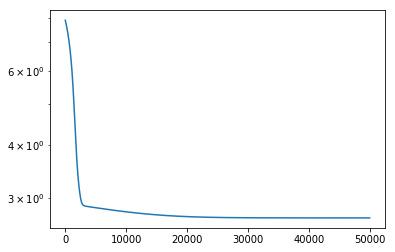

In [3]:
# Plot the ssr with log scaling on the y axis
plt.semilogy(ssr)

# Logistic Regression defined

https://www.kdnuggets.com/2019/01/logistic-regression-concise-technical-overview.html